# Data Prep

In [1]:
import pandas as pd
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('wordnet')
# nltk.download('omw-1.4')


from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import seaborn as sns

# text basic cleaning

In [ ]:
# replace id with other artists
artist_id_ = 80229195

In [7]:
#whole dataframe
def get_data(artist_id_input):
    #total_df = pd.read_csv('gg_final_dataframe.csv')
    total_df = pd.read_csv('boygroup_final_dataframe2.csv')
    df = total_df[total_df['artist_id']==int(artist_id_input)][['artist_x', 'song_name', 'year', 'Lyric']]
    return df


def basic_cleaning(artist_id):
    
    df = get_data(artist_id)
        
    def clean_text(text):

        manual_sw = ['im', 'youre', "n't", '내', '나를', '나의', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더',
    '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
    'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 'amp', 'comp',
    'tu', 'ye', 'it', 'i', 'but', '너무', 'so', 'in', '또', 'roob', '왔니', '조금', '꼭', '이렇게',
    'bo', 'peep', 'the','lolli', '정말', 'for', 'lollipop', '이제', 'on', 'muzik', 'lets', 'about', 
    '처', 'amoled', '좀', '두', '닷닷닷닷닷', '어쩌다', '4', 'is', 'and', 'to', 'you', 'me','huh', 'now', 'ooop',
    'just', 're', 'jumpin', 'dori', 'let', 'one', '아', 'ma', 'take', 'its', 'woo', 'this', 'that',
    'whoo', 'get', 'are', 'dovey', 'hey', '어머어머', 'hush', '오', '나는', '너는', '슈가프리', '자꾸', '위', '아래', '것', '있어', '같아', '돼', 'ya', 'tickle', 'ha',
    'way', '싶어', '같은', '오늘', '딱', '않아', '마', 'poppy','같아', 'day', 'be', 'rollin', '게', 'ba', 'hoo', 'ey', 'pa', 'ooh', 'swan', 'woo', 'ill', 'da', 'zu',
    'zim', 'dam', 'dda', 'got', 'umpah','안', '건', '할','것도', 'at', 'yah', 'all', 'with', 'ae']


        #changing to lowercase
        text = text.lower()
        text = text.replace('\r','')

        # removing #´s 
        text = re.sub(r'#[A-Za-z0-9]+', '', text)
        text = re.sub(r'#', '', text)

        #indentation -> space
        text = re.sub(r'\n', ' ', text)

        for punctuation in string.punctuation:
            text = text.replace(punctuation, '') 

        #strip
        text = text.strip()

        #tokenization
        tokens = word_tokenize(text)   
        filtered_words = [w for w in tokens if w not in manual_sw]
        final = " ".join(cat for cat in filtered_words)

        return final

    def kor_to_eng(text):
        
        #love related
        text = text.replace("사랑", "love")
        text = text.replace("좋아", "like") # like has multiple meanings, so needs to n-gram as well
        text = text.replace("키스", "kiss")
        text = text.replace("입맞", "kiss")
        text = text.replace("뽀뽀", "kiss")
        text = text.replace("터치", 'touch')
        text = text.replace("안아", 'hug')
        text = text.replace("원해", "want")
        text = text.replace("원하", "want")
        text = text.replace("밤", "night")
        
        #pronouns
        text = text.replace("내", "my")
        text = text.replace("나의", "my")
        text = text.replace('우리', 'we')

        #gender-specific
        text = text.replace("남자", "man")
        text = text.replace("소년", 'boy')
        text = text.replace("오빠", "oppa")
        text = text.replace("그의", 'him')
        text = text.replace("그에게", 'him')
        text = text.replace("그와", 'him')
        text = text.replace("그를", 'him')
        text = text.replace("그가", 'him')
        text = text.replace("그는", 'him')
        text = text.replace("놈", 'guy')

        text = text.replace("소녀", "nyeo") #young girl (少女)
        text = text.replace("여자", "woman")
        text = text.replace("그녀", 'her')

    # want & girl should be dealt with n-grams because the meaning is completely different 
    #between English and Korean
    #돈 (money)

        return text
    
    
    df['cleaned_lyrics'] = df.Lyric.apply(clean_text)
    df['final_lyrics'] = df.cleaned_lyrics.apply(kor_to_eng)
    df = df.groupby(['year']).sum()[['final_lyrics']]
#     df.drop(columns = ['Lyric', 'cleaned_lyrics'], inplace = True)# bp_df

    return df

    

## Instantiate a dataframe 

In [20]:
df = basic_cleaning(artist_id_)
total_lyrics = " ".join(cat for cat in df.final_lyrics)

,final_lyrics
year,
2008,누나는 예뻐서 man들이 가만안둬 흔들리는 her의 마음 사실 알고있어 her에게 ...
2009,stand by 바라봐줘 아직 love을 모르지만 stand by 지켜봐줘 아직 l...
2010,숨을 곳도 찾지 못해 피하려고 애써봐도 거부조차 없는 네게 갇혀버린 love이었다면...
2012,shinee back shinee back shinee back back back ...
2013,night새 얼굴을 그려보다가 제멋대로 한 상상에 민망해지곤 해 어느새 안에서 커져...
2015,모두 말을 잃지 like 4차원 이상의 기적의 view 달콤히 찍어 문 빛의 퐁듀 ...
2016,하루 중에 1분 1초 다르듯 날마다 새로워져 하나 중에 그중에 제일 첫 번째 유일하...
2018,포근한 어둠이 저 멀리 맴돌고 있잖니 조금씩 빌딩에 걸린 노을 끝자락에 떠올려 어둠...
2021,dont call check out yoll dont call dont call d...


In [59]:
total_lyrics = " ".join(cat for cat in df.final_lyrics)

# wordcloud

In [56]:
def wordcloud_by_year(artist_id):
    
    df = basic_cleaning(artist_id)
    
    def by_year(df):
        lyrics_of_years = []
        for i in range(len(df)):
            one_year = " ".join(cat for cat in df.iloc[i, :])
            lyrics_of_years.append(one_year)
        return lyrics_of_years


    lyric_lst = by_year(df)
    year_lst = [i for i in df.index]
    
    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
        colormap='BuPu', max_words=100, collocations = False).generate(lyric)

        plt.figure(figsize = (10,8))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(year_lst[lyric_lst.index(lyric)])
        plt.show()
        
        

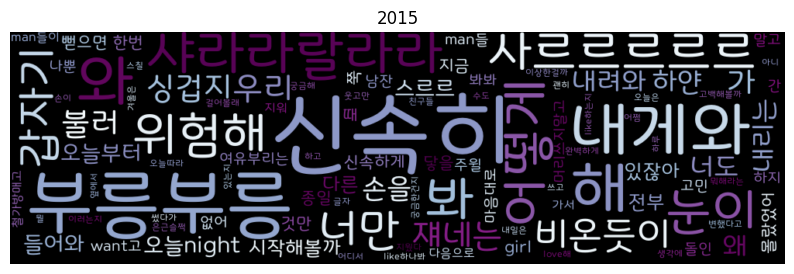

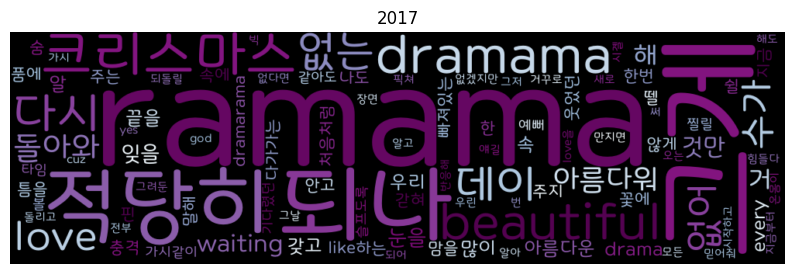

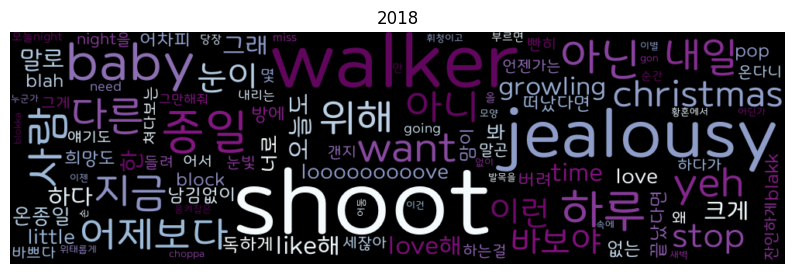

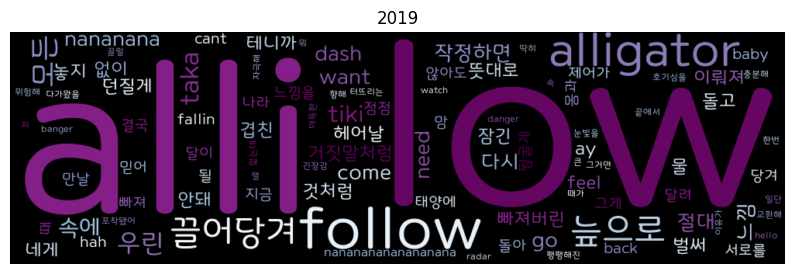

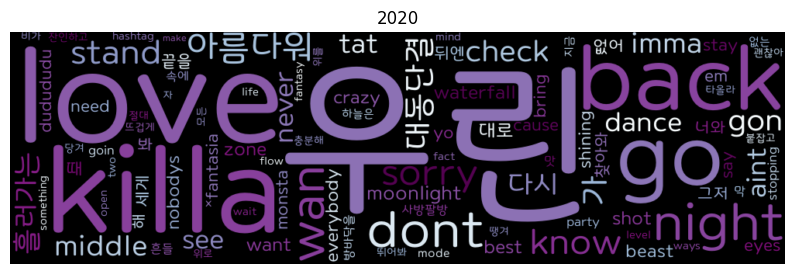

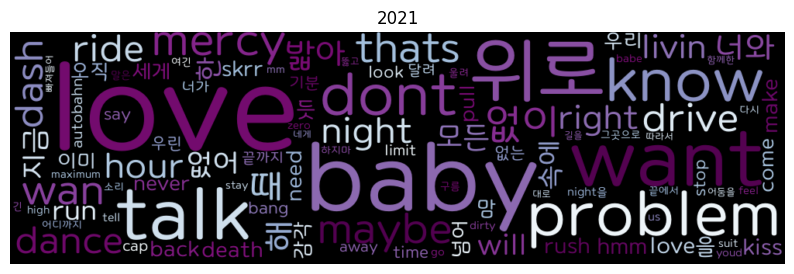

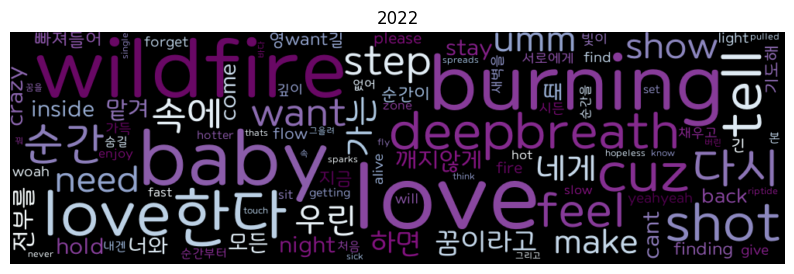

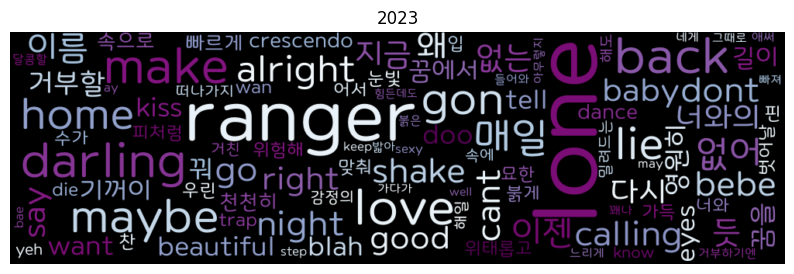

In [57]:
wordcloud_by_year(artist_id_)

## total wordcloud

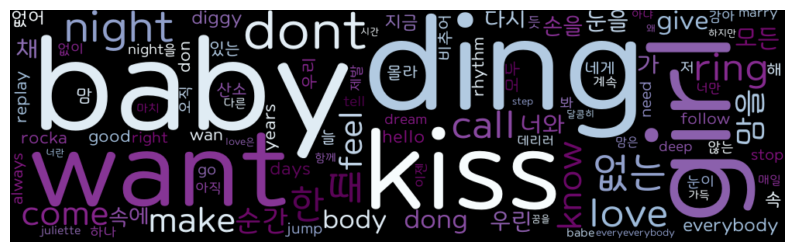

In [60]:
word_cloud_year(total_lyrics)

# word ranking

In [ ]:
def word_ranking(df_year):

    wordlist = df_year.split()
    wordfreq = [wordlist.count(p) for p in wordlist]
    freqdict = dict(list(zip(wordlist,wordfreq)))

    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    
    df = pd.DataFrame(aux)
    df = df.rename(columns = {0: 'frequency', 1:'keyword'})
    
    return df[:200]

In [61]:
keyword_total = word_ranking(total_lyrics)
keyword_total

NameError: name 'word_ranking' is not defined

### plot

In [ ]:
keyword_25 = keyword_total[:25]
keyword_25

In [ ]:
sns.set_theme(style="whitegrid")
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False

# Initialize the matplotlib figure
plt.figure(figsize=(13,5))
plt.rcParams["font.family"] = "AppleGothic"

# Plot the total keywords
sns.set_color_codes("pastel")
sns.barplot(x="frequency", y="keyword", data=keyword_25, color="pink")

sns.despine(left=True, bottom=True)

## word frequency

In [63]:
def word_by_years(text, word):
    num_of_word = text.count(word)
    len_of_df = len(text)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 3)

In [65]:
df['love'] = df.final_lyrics.apply(lambda x: word_by_years(x, "love"))
df['kiss'] = df.final_lyrics.apply(lambda x: word_by_years(x, "kiss"))
df['touch'] = df.final_lyrics.apply(lambda x: word_by_years(x, "touch"))
df['feel'] = df.final_lyrics.apply(lambda x: word_by_years(x, "feel"))
df['like'] = df.final_lyrics.apply(lambda x: word_by_years(x, "like"))
df['baby'] = df.final_lyrics.apply(lambda x: word_by_years(x, "baby"))
df['night'] = df.final_lyrics.apply(lambda x: word_by_years(x, "night"))
df['my'] = df.final_lyrics.apply(lambda x: word_by_years(x, "my"))
df['we'] = df.final_lyrics.apply(lambda x: word_by_years(x, "we"))

#female
df['so-nyo'] = df.final_lyrics.apply(lambda x: word_by_years(x, "nyeo"))
df['woman'] = df.final_lyrics.apply(lambda x: word_by_years(x, "woman"))
df['girl'] = df.final_lyrics.apply(lambda x: word_by_years(x, "girl"))
df['girls'] = df.final_lyrics.apply(lambda x: word_by_years(x, "girls"))
df['noona'] = df.final_lyrics.apply(lambda x: word_by_years(x, "noona"))
df['her'] = df.final_lyrics.apply(lambda x: word_by_years(x, "her"))
df['lady'] = df.final_lyrics.apply(lambda x: word_by_years(x, "lady"))

#male
df['he/him/his'] = df.final_lyrics.apply(lambda x: word_by_years(x, "him"))
df['guy'] = df.final_lyrics.apply(lambda x: word_by_years(x, "guy"))
df['boy'] = df.final_lyrics.apply(lambda x: word_by_years(x, "boy"))
df['man'] = df.final_lyrics.apply(lambda x: word_by_years(x, "man"))
df['oppa'] = df.final_lyrics.apply(lambda x: word_by_years(x, "oppa"))
df['mr'] = df.final_lyrics.apply(lambda x: word_by_years(x, "mr"))
                                                           
df['want'] = df.final_lyrics.apply(lambda x: word_by_years(x, "wan"))

## plot

In [66]:
keywords_df = df.drop(columns=['final_lyrics'])

In [67]:
keywords_df

,love,kiss,touch,feel,like,baby,night,my,we,so-nyo,...,noona,her,lady,he/him/his,guy,boy,man,oppa,mr,want
year,,,,,,,,,,,,,,,,,,,,,
2008,0.676,0.000,0.0,0.000,0.075,0.038,0.000,0.038,0.000,0.000,...,0.0,0.413,0.000,0.000,0.000,0.075,0.038,0.0,0.0,0.150
2009,0.522,0.027,0.0,0.000,0.027,0.027,0.000,0.082,0.055,0.000,...,0.0,0.192,0.027,0.000,0.082,0.027,0.027,0.0,0.0,0.055
2010,1.107,0.055,0.0,0.000,0.000,0.166,0.000,0.000,0.000,0.000,...,0.0,0.111,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.055
2012,0.000,0.000,0.0,0.000,0.000,0.323,0.323,0.000,0.000,0.000,...,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000
2013,0.185,0.000,0.0,0.000,0.000,0.278,0.393,0.023,0.000,0.023,...,0.0,0.000,0.000,0.046,0.000,0.000,0.000,0.0,0.0,0.000
2015,0.625,0.000,0.0,0.037,0.221,0.294,0.147,0.037,0.074,0.000,...,0.0,0.000,0.037,0.000,0.000,0.000,0.074,0.0,0.0,0.037
2016,0.141,0.038,0.0,0.320,0.077,0.435,0.153,0.102,0.064,0.000,...,0.0,0.077,0.038,0.000,0.000,0.000,0.000,0.0,0.0,0.269
2018,0.119,0.000,0.0,0.040,0.040,0.178,0.654,0.178,0.020,0.000,...,0.0,0.020,0.000,0.000,0.000,0.040,0.000,0.0,0.0,0.258
2021,0.275,0.501,0.0,0.029,0.147,0.029,0.196,0.422,0.088,0.000,...,0.0,0.118,0.000,0.000,0.000,0.000,0.010,0.0,0.0,0.393


In [68]:
keywords_df = df.drop(columns=['final_lyrics'])

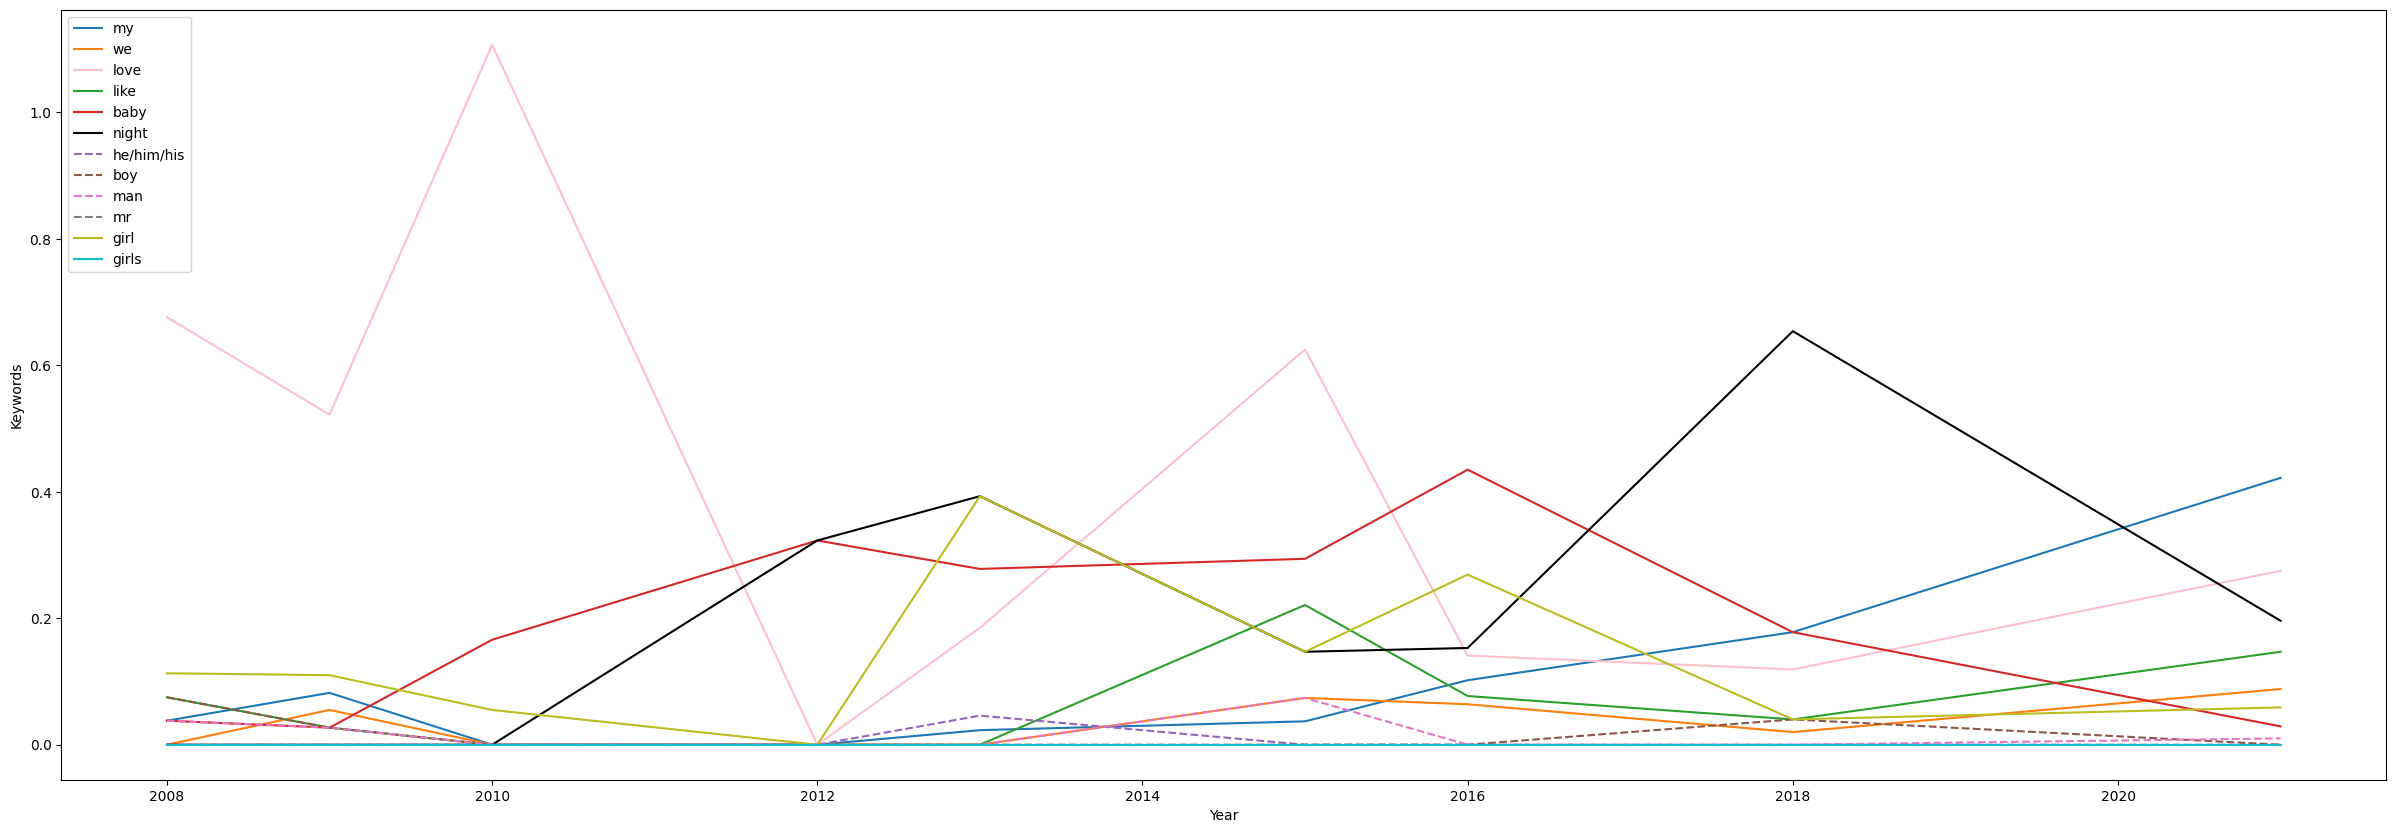

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas import DataFrame

plt.figure(figsize = (30,10))


plt.plot(keywords_df['my'], label = 'my')
plt.plot(keywords_df['we'], label = 'we')

#love-related
plt.plot(keywords_df['love'], label = 'love', color = 'pink')
plt.plot(keywords_df['like'], label = 'like')
plt.plot(keywords_df['baby'], label = 'baby')
# plt.plot(keywords_df['kiss'], label = 'kiss')
# plt.plot(keywords_df['touch'], label = 'touch')
# plt.plot(keywords_df['feel'], label = 'feel')
plt.plot(keywords_df['night'], label = 'night', color = 'black')

## GIRLGROUP specific
plt.plot(keywords_df['he/him/his'], linestyle='dashed', label = 'he/him/his')
plt.plot(keywords_df['boy'], linestyle='dashed', label = 'boy')
plt.plot(keywords_df['man'], linestyle='dashed', label = 'man')
plt.plot(keywords_df['mr'], linestyle='dashed', label = 'mr')
plt.plot(keywords_df['girl'], label = 'girl') #mostly related to hetero-normative term
plt.plot(keywords_df['girls'], label = 'girls') #mostly related to women empowerment(girlhood)
# plt.plot(keywords_df['so-nyo'], label = 'sonyo') - not significant


## BOYGROUPS specific

# plt.plot(keywords_df['her'], label = 'her')
# plt.plot(keywords_df['girl'], label = 'girl')
# plt.plot(keywords_df['woman'], color='red', label = 'woman')
# plt.plot(keywords_df['girls'], label = 'girls')



## 보류

# plt.plot(keywords_df['want'], label = 'want')
# plt.plot(keywords_df['why'], label = 'why')

plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Keywords")
plt.show()